In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

In [2]:
import sys ; sys.path += ['../']

from Pycode.Data_Aquisition import get_crypto_data
from Pycode.Features_Engineering import *
from Pycode.train_XGB import *

**TABLE OF CONTENT**
* [Data Pipeline](#data-bullet)
* [XGBoost](#xgb_run-bullet)

## Data Pipeline<a class="anchor" id="data-bullet"></a>

- EUR/BTC Prices from 1591048800 to 1598248800 
- EUR/BTC Prices from 1583848800 to 1591048800 
- EUR/BTC Prices from 1576648800 to 1583848800 
- EUR/BTC Prices from 1569448800 to 1576648800 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 22:00:00 to 2020-08-24 06:00:00
Data columns (total 6 columns):
close         8000 non-null float64
high          8000 non-null float64
low           8000 non-null float64
open          8000 non-null float64
volumefrom    8000 non-null float64
volumeto      8000 non-null float64
dtypes: float64(6)
memory usage: 437.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 22:00:00 to 2020-08-24 06:00:00
Data columns (total 6 columns):
close         8000 non-null float64
high          8000 non-null float64
low           8000 non-null float64
open          8000 non-null float64
volumefrom    8000 non-null float64
volumeto      8000 non-null float64
dtypes: float64(6)
memory usage: 437.5 KB
None
<cl

../Pycode/Features_Engineering.py:66: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat)
../Pycode/Features_Engineering.py:67: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H.diff'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat).diff()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 22:00:00 to 2020-08-24 06:00:00
Columns: 858 entries, volumefrom to volumeto_mov24H.MSum24H.diff
dtypes: float64(858)
memory usage: 52.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 22:00:00 to 2020-08-24 06:00:00
Columns: 1716 entries, volumefrom to volumeto_mov24H.MSum24H.diff.Squared
dtypes: float64(1716)
memory usage: 104.8 MB
BTC Price.PSARs_0.02_0.2                 4102
BTC Price.SUPERTl_7_3.0                  4038
BTC Price.SUPERTs_7_3.0                  3968
BTC Price.PSARl_0.02_0.2                 3900
BTC Price.ISB_26                           77
BTC Price.EOM_14_100000000                 56
BTC Price.KSTs_9                           52
BTC Price.ISA_9                            51
BTC Price.KST_10_15_20_30_10_10_10_15      44
BTC Price.TRIXs_30_9                       38
BTC Price.MASSI_9_25                       32
BTC Price.TRIX_30_9                       

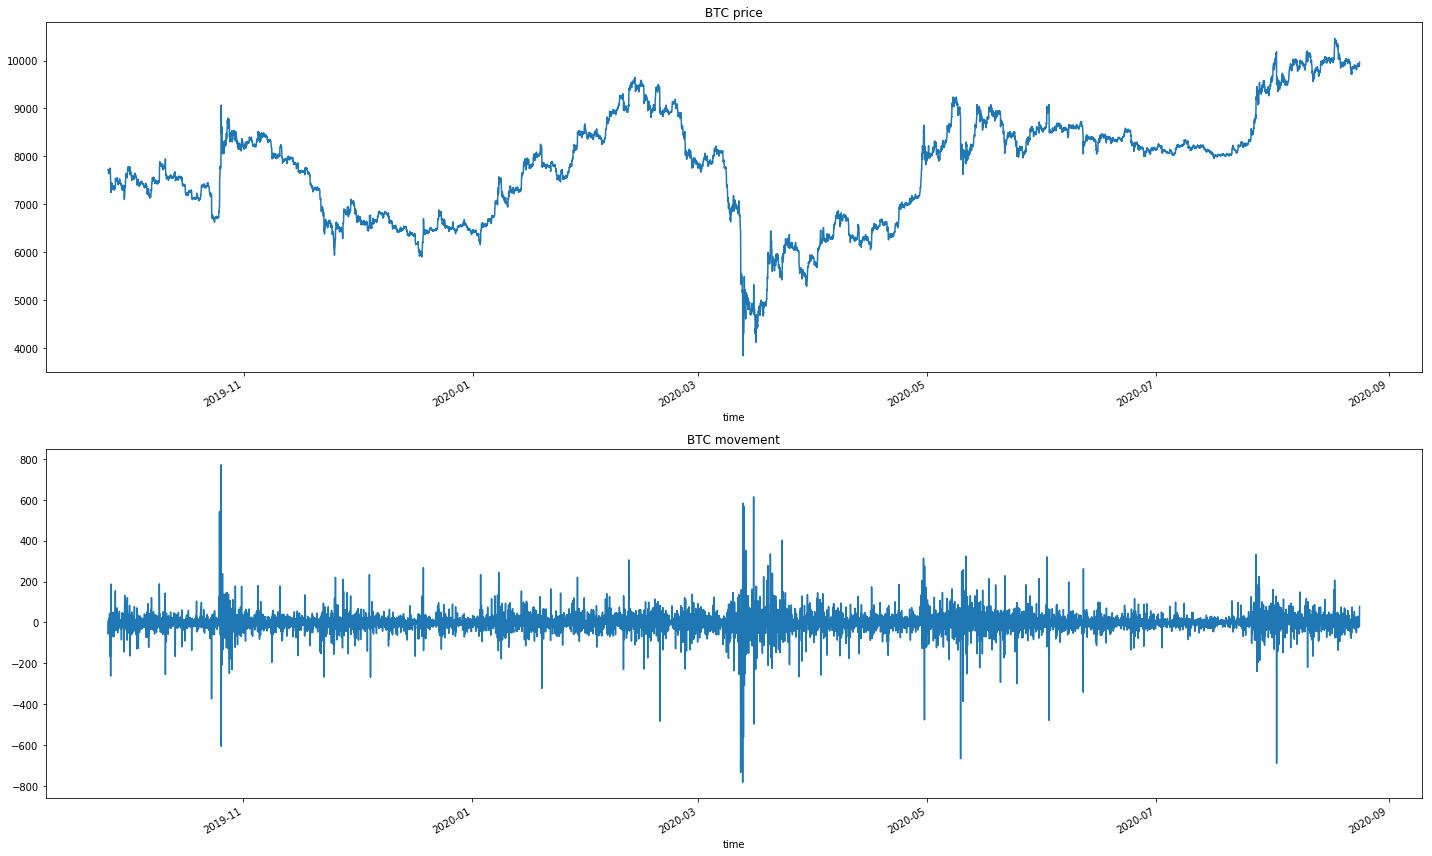

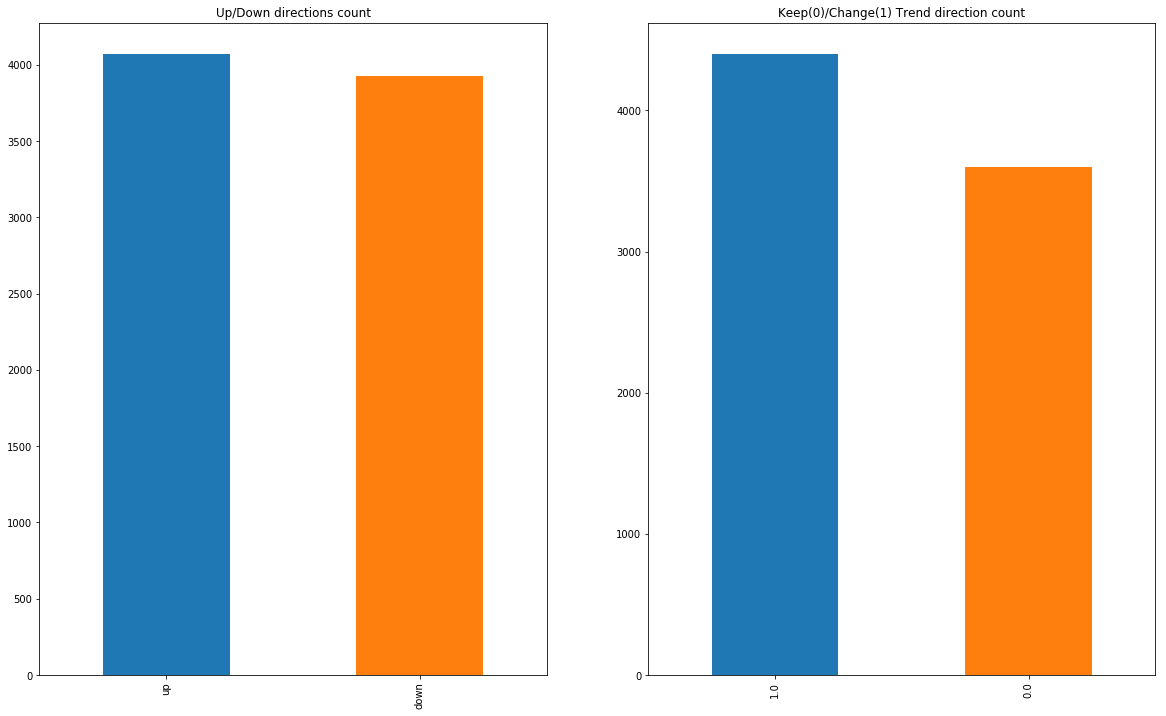

time
2020-08-23 11:00:00    0.0
2020-08-23 12:00:00    0.0
2020-08-23 13:00:00    0.0
2020-08-23 14:00:00    0.0
2020-08-23 15:00:00    1.0
2020-08-23 16:00:00    0.0
2020-08-23 17:00:00    1.0
2020-08-23 18:00:00    0.0
2020-08-23 19:00:00    1.0
2020-08-23 20:00:00    1.0
2020-08-23 21:00:00    1.0
2020-08-23 22:00:00    0.0
2020-08-23 23:00:00    0.0
2020-08-24 00:00:00    0.0
2020-08-24 01:00:00    1.0
2020-08-24 02:00:00    0.0
2020-08-24 03:00:00    1.0
2020-08-24 04:00:00    0.0
2020-08-24 05:00:00    1.0
2020-08-24 06:00:00    NaN
Name: close, dtype: float64
{1.0: 4402, 0.0: 3596}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass k=400 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7921 entries, 2019-09-28 03:00:00 to 2020-08-23 04:00:00
Columns: 400 entries, volumefrom to BTC Price.Z_30.Mov
dtypes: object(400)
memory usage: 24.2+ MB
- 0 NaNs in the dataset (features & target)
(7921, 400) (7921,)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7921 entries, 2019-09-28 03:00:00 to 2020-08-23 04:00:00
Columns: 400 entries, volumefrom to BTC Price.Z_30.Mov
dtypes: object(400)
memory usage: 24.2+ MB
None
(7921, 400) (7585, 400) (336, 400)


In [3]:
# Params
n_batch_obs=4 # x2000 obs / batch
currency = 'EUR'
exchange = 'Coinbase'
n_best = 400
n_test = 1000 #test set for the model training
n_val = 2*7*24 #out of the box set for after tuning validation

# Get data from API
df = get_crypto_data(n_batch_obs=n_batch_obs,  currency=currency, exchange=exchange)

# Create the features dataset
feats_df = features_engineering(df)

# Create the target series
target, class_weights = target_engineering(df)

# Select Kbest features
kbest_selector, kbest_df = features_selection(feats_df, target, n_best)


# Prepare the data for XGB Trainng
X_scaler, df_train_scaled, df_val_scaled, target_train, target_val = XGB_Data_Preparation(kbest_df, 
                                                                                          target, 
                                                                                          n_val=n_val)



## Run the XGB pipeline<a class="anchor" id="xgb_run-bullet"></a>
### Open to Close Trading Signal

In [ ]:
# params
n_tune = 20 # number of combinations to try during tuning


# Tuning for Close-Close Trading Signal
tuning_df = XGB_Tuning_Pipeline(df_train_scaled, df_val_scaled, target_train, target_val,
                                n_test=n_test, n_tune=n_tune)

# Get best params
best_params = tuning_df.iloc[0, 0]
print('Best parameters: {}'.format(best_params))
print('='*110)

# Validation of the tuned model
xgb_reg, df_test, df_backtest = XGB_Eval_Pipeline(best_params, 
                                                  df_train_scaled, df_val_scaled, target_train, target_val, 
                                                  n_test=n_test)



* 1/20: (0.1763, 0.8, 0.8)
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 400 rounds.
Stopping. Best iteration:
[257]	train-auc:0.907844	test-auc:0.573647

* 2/20: (0.4258, 0.3011, 0.0932)
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 400 rounds.
Stopping. Best iteration:
[308]	train-auc:0.949657	test-auc:0.596422

* 3/20: (0.7584, 0.2179, 0.5921)
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 400 rounds.
Stopping. Best iteration:
[335]	train-auc:0.988274	test-auc:0.592766

* 4/20: (0.8, 0.4674, 0.4674)
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 400 rounds.
Stopping. Best iteration:
[123]	train-auc:0.96405	test-auc:0.604314

* 5/20: (0.3011, 0.5089, 0.758

In [ ]:
params = (0.4674, 0.0932, 0.5089)

df_train_kbest = df_train_scaled.copy()
df_val_kbest = df_val_scaled.copy()

xgb_evals = {}

# Slice training data for CV
X_train = df_train_kbest.iloc[:-n_test, :].values
X_test = df_train_kbest.iloc[-n_test:, :].values

y_train = target_train.iloc[:-n_test].values
y_test = target_train.iloc[-n_test:].values

X_val = df_val_kbest.values
y_val = target_val.values

# XGB Matrix datasets
dm_train = xgb.DMatrix(data=X_train, label=y_train,
                       feature_names=df_train_kbest.columns,
                       nthread=os.cpu_count())

dm_test = xgb.DMatrix(data=X_test, label=y_test,
                      feature_names=df_train_kbest.columns,
                      nthread=os.cpu_count())

dm_val = xgb.DMatrix(data=X_val, label=y_val,
                     feature_names=df_val_kbest.columns,
                     nthread=os.cpu_count())

# Fit model
n_rounds = 2000
xgb_reg = xgb.train(params={'objective': "binary:logistic", 'booster': 'gbtree',
                            'tree_method': 'hist', 'grow_policy': 'lossguide',
                            
                            'eval_metric': 'auc',

                            'silent': True, 'n_jobs': os.cpu_count(), 'random_state': 123,

                            "learning_rate": 0.001, "gamma": 0, "max_depth": 7,
                            "reg_alpha": 0.01, "reg_lambda": 0,

                            "subsample": params[0],
                            "colsample_bytree": params[1],
                            "colsample_bylevel": params[2]

                            },

                    dtrain=dm_train, num_boost_round=n_rounds,
                    #callbacks=[xgb.callback.early_stop(stopping_rounds=400, maximize=False, verbose=True)],

                    # Training scoring
                    evals=[(dm_train, 'train'), (dm_test, 'test')],
                    verbose_eval=20, evals_result=xgb_evals)


# Score on Validation Set
y_probas = xgb_reg.predict(dm_val)
y_preds = 1 * (y_probas > 0.5)

auc = roc_auc_score(y_val, y_probas)
acc = np.mean(y_preds == y_val)


print('\n=> XGB Score on Validation set ({} obs): AUC: {}\tAccuracy: {}'.format(len(y_val),
                                                                                round(auc, 2),
                                                                                str(100 * acc) + '%'))


# Format test values as dataframe
df_test = pd.DataFrame({'Real Label': y_test,
                        'Predicted Label': xgb_reg.predict(dm_test)},
                       index=target_train.iloc[-n_test:].index).round(0)

# Format the forecasts for Trading Backtesting
df_backtest = pd.DataFrame({'Real Label': y_val,
                            'Predicted Label': y_preds}, index=target_val.index).round(0)


# Add the Labels Keep(0)/Change(1)
df_test['Predicted Trend'] = df_test['Predicted Label'].map({1:'Change',  0: 'Keep'})
df_backtest['Predicted Trend'] = df_backtest['Predicted Label'].map({1: 'Change', 0: 'Keep'})


# Features Importance
ftype_list = ['weight', 'total_gain']

plt.rcParams['figure.figsize'] = (16, 6 * len(ftype_list))
fig, ax = plt.subplots(nrows=len(ftype_list))

for i, ftype in enumerate(ftype_list):
    # Sorted importance
    drivers_weight = pd.Series(xgb_reg.get_score(fmap='', importance_type=ftype)).sort_values(ascending=False)

    # Subplot
    _ = drivers_weight.iloc[:20].plot(kind='bar', color='b', ax=ax[i],
                                      title='Features Importance - {} criteria'.format(ftype))

_ = plt.tight_layout()
plt.show()


In [ ]:
# Plot the predicted labels
_ = df_backtest.iloc[-20:, :].plot(kind='bar', title='Real vs Predicted binary labels on Validation Set')
plt.show()

df_backtest

In [ ]:
#kbest_selector, X_scaler, xgb_reg


# Pickle the fitted objects to /Trained
for obj, name in zip([kbest_selector, X_scaler, xgb_reg], 
                     ['kbest_selector_XGB.pkl', 'X_scaler_XGB.pkl', 'trained_XGB.pkl']):
    pkl_path = os.path.join(os.path.abspath('../'), 'Trained/{}'.format(name))
    print(pkl_path)

    with open(pkl_path, 'wb') as pickled:
        pickle.dump(obj, pickled)
        